In [31]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import joblib
from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_csv("/kaggle/input/190k-spam-ham-email-dataset-for-classification/spam_Emails_data.csv")
df

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...
...,...,...
193847,Ham,on escapenumber escapenumber escapenumber rob ...
193848,Spam,we have everything you need escapelong cialesc...
193849,Ham,hi quick question say i have a date variable i...
193850,Spam,thank you for your loan request which we recie...


In [33]:
df = df.join(pd.get_dummies(df['label']).astype(int))

In [34]:
df.isnull().sum()

label    0
text     2
Ham      0
Spam     0
dtype: int64

In [35]:
df.dropna(inplace=True)

In [36]:
df.drop(['label','Ham'],axis=1,inplace=True)
df

,text,Spam
0,viiiiiiagraaaa\nonly for the ones that want to...,1
1,got ice thought look az original message ice o...,0
2,yo ur wom an ne eds an escapenumber in ch ma n...,1
3,start increasing your odds of success & live s...,1
4,author jra date escapenumber escapenumber esca...,0
...,...,...
193847,on escapenumber escapenumber escapenumber rob ...,0
193848,we have everything you need escapelong cialesc...,1
193849,hi quick question say i have a date variable i...,0
193850,thank you for your loan request which we recie...,1


In [37]:
X = df.text
y = df.Spam


In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=45,test_size=0.25)

v = CountVectorizer()
X_train_count = v.fit_transform(X_train)


In [39]:
X_train_count[0:4].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
mnNb = MultinomialNB()
mnNb.fit(X_train_count,y_train)

MultinomialNB()

In [41]:
email = ['Hey mohan, can we get together to watch football game tomorrow?',
        'Upto 20% dicount on parking, exclusive offer just for you. Dont miss this reward!']


In [42]:
def get_text_predict(text):
    text_count = v.transform(text)
    return print(mnNb.predict(text_count))

In [43]:
get_text_predict(email)

[0 1]


In [44]:
X_test_count = v.transform(X_test)
mnNb.score(X_test_count,y_test)

0.9630646059880734

In [45]:
joblib.dump(mnNb,'spam_Email_model')

['spam_Email_model']

In [46]:
mnp = joblib.load('spam_Email_model')

In [47]:
def get_text_predict(text):
    text_count = v.transform(text)
    return print(mnp.predict(text_count))

In [48]:
get_text_predict(email)

[0 1]


In [49]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
# Cell 2 (Updated): Load dataset and inspect column names
df = pd.read_csv("/kaggle/input/190k-spam-ham-email-dataset-for-classification/spam_Emails_data.csv")
print(df.columns)
df.head()

Index(['label', 'text'], dtype='object')


,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


In [51]:
# Cell 3: Rename columns as per actual dataset
# Adjust based on your dataset's actual column names
df = df.rename(columns={'EmailText': 'text', 'Label': 'label'})
df = df[['text', 'label']]
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # convert to numeric
df.dropna(inplace=True)
df.head()


,text,label


In [52]:
# Cell 4: Preprocess the text
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [53]:
# Check the first few rows of 'text' and 'clean_text' to debug
print(df[['text', 'clean_text']].head(10))

Empty DataFrame
Columns: [text, clean_text]
Index: []


In [54]:
import pandas as pd

df = pd.read_csv("/kaggle/input/190k-spam-ham-email-dataset-for-classification/spam_Emails_data.csv")
print(df.columns)
print(df.head())

Index(['label', 'text'], dtype='object')
  label                                               text
0  Spam  viiiiiiagraaaa\nonly for the ones that want to...
1   Ham  got ice thought look az original message ice o...
2  Spam  yo ur wom an ne eds an escapenumber in ch ma n...
3  Spam  start increasing your odds of success & live s...
4   Ham  author jra date escapenumber escapenumber esca...


In [55]:
df = df[['text', 'label']]
df.dropna(inplace=True)
df.head()


,text,label
0,viiiiiiagraaaa\nonly for the ones that want to...,Spam
1,got ice thought look az original message ice o...,Ham
2,yo ur wom an ne eds an escapenumber in ch ma n...,Spam
3,start increasing your odds of success & live s...,Spam
4,author jra date escapenumber escapenumber esca...,Ham


In [56]:
import re

# Safe text cleaning function
def clean_text_safe(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Keep only letters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply the function to clean the text column
df['clean_text'] = df['text'].apply(clean_text_safe)
print(df[['text', 'clean_text']].head())

                                                text  \
0  viiiiiiagraaaa\nonly for the ones that want to...   
1  got ice thought look az original message ice o...   
2  yo ur wom an ne eds an escapenumber in ch ma n...   
3  start increasing your odds of success & live s...   
4  author jra date escapenumber escapenumber esca...   

                                          clean_text  
0  viiiiiiagraaaa only for the ones that want to ...  
1  got ice thought look az original message ice o...  
2  yo ur wom an ne eds an escapenumber in ch ma n...  
3  start increasing your odds of success live sex...  
4  author jra date escapenumber escapenumber esca...  


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['label'].map({'Spam': 1, 'Ham': 0})  # Map labels to 1 and 0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)


(155080, 5000) (38770, 5000)


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 97.22%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     20317
           1       0.97      0.98      0.97     18453

    accuracy                           0.97     38770
   macro avg       0.97      0.97      0.97     38770
weighted avg       0.97      0.97      0.97     38770

Confusion Matrix:
[[19668   649]
 [  429 18024]]


In [59]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize base models
lr = LogisticRegression()
nb = MultinomialNB()
rf = RandomForestClassifier()

# Create a Voting Classifier (Hard Voting)
voting_clf = VotingClassifier(estimators=[('lr', lr), ('nb', nb), ('rf', rf)], voting='hard')

# Train Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict with the model
y_pred_voting = voting_clf.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Accuracy of Voting Classifier: {accuracy_voting:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Voting Classifier: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     20317
           1       0.97      0.98      0.97     18453

    accuracy                           0.98     38770
   macro avg       0.98      0.98      0.98     38770
weighted avg       0.98      0.98      0.98     38770


Confusion Matrix:
 [[19801   516]
 [  431 18022]]


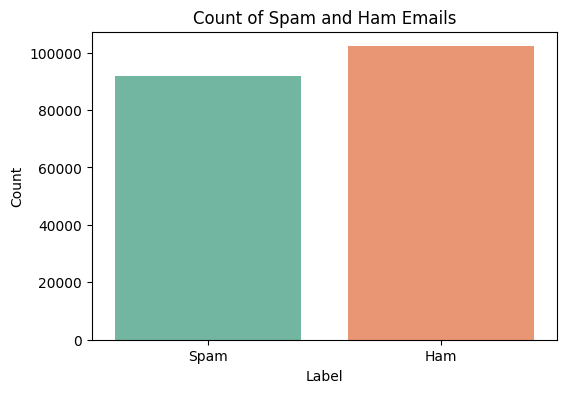

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Count of Spam and Ham Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

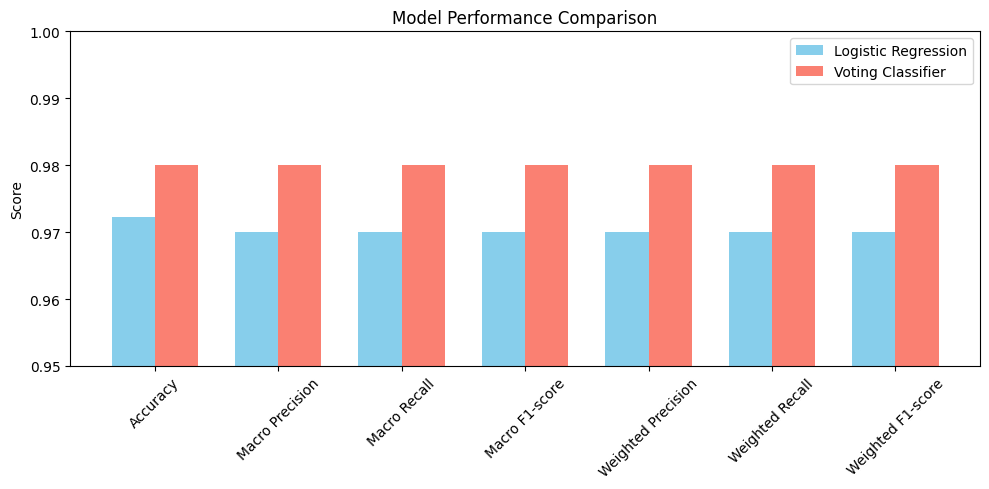

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics excluding Support
labels = ['Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1-score',
          'Weighted Precision', 'Weighted Recall', 'Weighted F1-score']

lr_values = [0.9722, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97]
voting_values = [0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, lr_values, width, label='Logistic Regression', color='skyblue')
plt.bar(x + width/2, voting_values, width, label='Voting Classifier', color='salmon')

plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, labels, rotation=45)
plt.ylim(0.95, 1.0)
plt.legend()
plt.tight_layout()
plt.show()


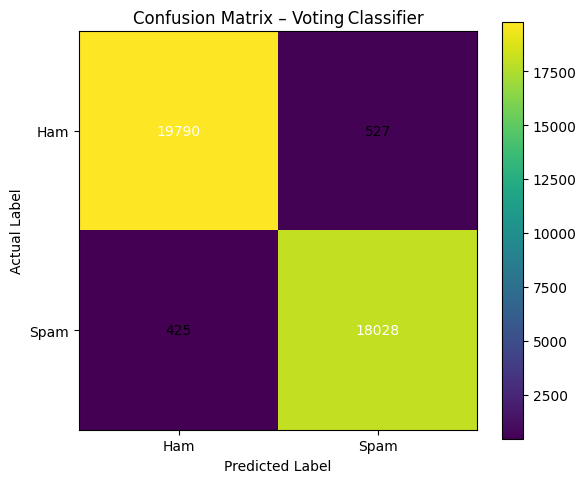

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix from the Voting Classifier result
conf_matrix = np.array([[19790, 527],
                        [425, 18028]])

labels = ['Ham', 'Spam']

plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, interpolation='nearest')
plt.title('Confusion Matrix – Voting Classifier')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Annotate counts on each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


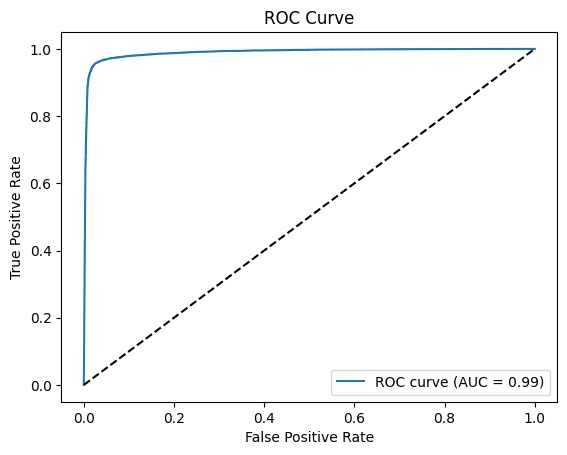

In [68]:
from sklearn.metrics import roc_curve, auc

# Get original text for X_test indices from the 'clean_text' column in your DataFrame
X_test_text = df['clean_text'][y_test.index]

# Use the original text for prediction and ROC curve calculation
y_probs = mnNb.predict_proba(v.transform(X_test_text))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

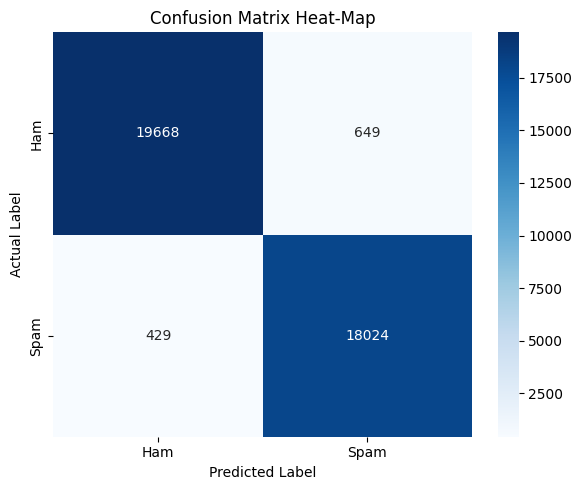

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns                 # only here for heat‑map convenience
from sklearn.metrics import confusion_matrix

# ---- get predictions (adjust model name as needed) ----
y_pred = model.predict(X_test)

# ---- compute the confusion matrix ----
cm = confusion_matrix(y_test, y_pred)
labels = ['Ham', 'Spam']              # 0 = Ham, 1 = Spam

# ---- plot the heat‑map ----
plt.figure(figsize=(6, 5))
sns.heatmap(cm,
            annot=True, fmt='d',       # print raw counts
            cmap='Blues',              # color palette
            xticklabels=labels,
            yticklabels=labels)

plt.title('Confusion Matrix Heat‑Map')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()


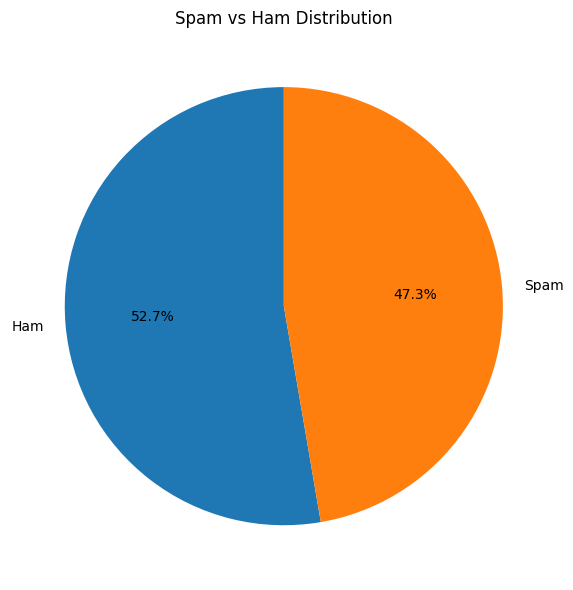

In [71]:
import matplotlib.pyplot as plt

counts = df['label'].value_counts()      # Spam vs Ham counts

plt.figure(figsize=(6, 6))
plt.pie(counts.values,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Spam vs Ham Distribution')
plt.tight_layout()
plt.show()
